# DNSM: Clustered Selection Factors 

In [1]:
import os, sys
import itertools
import pandas as pd
import numpy as np
from scipy import stats
from IPython.display import display
from collections import Counter
import pprint

import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

from dnsmex.dms_viz import *
from dnsmex.local import localify

In [2]:
# settings
ROUND_DIGITS = 4
BUILD_CSV = True
REBUILD_CSV = False

COLORS = {
    'dnsm_sf': '#675ed6',
    'rel_asa': '#808080'
}

In [3]:
prefix = "dnsm_clustered_selection_factors"

In [4]:
# input paths
DNSM_MODELS_DIR = localify("DNSM_TRAINED_MODELS_DIR")
DASM_MODELS_DIR = localify("DASM_TRAINED_MODELS_DIR")
MODELS_DIR = DNSM_MODELS_DIR

SABDAB_DIR = localify("SABDAB_DIR")
PDB_DB_DIR = f'{SABDAB_DIR}/pdb-db'
SABDAB_PATH = f'{SABDAB_DIR}/sabdab_summary_for_dnsm.tsv'
MAX_ASA_PATH = f'{SABDAB_DIR}/max_asa.csv'
DMSVIZ_OUTPUT_DIR = f'{SABDAB_DIR}'
DMSVIZ_TEMP_DIR = f'_temp'

FIGURES_DIR = localify("FIGURES_DIR")
FIGURES_OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
OUTPUT_DIR = f'{FIGURES_DIR}/{prefix}'
TEMP_DIR = f'_temp'

print(f"{FIGURES_OUTPUT_DIR=}")

FIGURES_OUTPUT_DIR='/home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors'


In [5]:
for path in [OUTPUT_DIR, TEMP_DIR, DMSVIZ_OUTPUT_DIR, DMSVIZ_TEMP_DIR]:
    print(f"{path=}")
    os.makedirs(path, exist_ok=True)

path='/home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors'
path='_temp'
path='/home/drich/shared-data/bcr-mut-sel/sabdab'
path='_temp'


## Load CSV

In [6]:
DNSM_MODEL_NAME = "dnsm_1m-v1jaffe+v1tang-joint"
pdbs_range = None
# pdbs_range = [0, 50]

In [7]:
if BUILD_CSV:
    util = DmsViz_Utility(
        output_dir=DMSVIZ_OUTPUT_DIR,
        temp_dir=DMSVIZ_TEMP_DIR,
        sabdab_path=SABDAB_PATH,
        pdb_db_dir=PDB_DB_DIR,
        dnsm_models_dir=DNSM_MODELS_DIR,
        dnsm_model_name=DNSM_MODEL_NAME,
    )
    util.PDB_PARSER_PERMISSIVE = True
    util.PDB_PARSER_QUIET = True
    util.ALWAYS_REBUILD_CSV = REBUILD_CSV
    util.PDBS_RANGE = pdbs_range
    util.update_pdbs_csv_path()
    pdbs_df = util.save_pdbs_table()

pdbs_df already found at: /home/drich/shared-data/bcr-mut-sel/sabdab/pdb-db.dnsm_1m-v1jaffe+v1tang-joint.ALL.csv


/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


In [8]:
util = DmsViz_Utility(
    output_dir=DMSVIZ_OUTPUT_DIR,
    temp_dir=DMSVIZ_TEMP_DIR,
    sabdab_path=SABDAB_PATH,
    pdb_db_dir=PDB_DB_DIR,
    dnsm_models_dir=DNSM_MODELS_DIR,
    dnsm_model_name=DNSM_MODEL_NAME,
)
util.PDBS_RANGE = pdbs_range
util.update_pdbs_csv_path()
init_pdbs_df = df_remove_index_cols(util.load_pdbs_table())

print(f"{util.PDB_CSV_PATH=}")
display(init_pdbs_df)

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:225: DtypeWarning: Columns (12,36,41,42,43,44,45,46,47,48,49,62,77,78,79,80,81,82,83,84,85,92,93,94,100,103,104,108,109,111,112,113,114,115,117,118,119,120,121,123,124,125,127,128,129,130,131,132,133,134,138,139,140,141,142,143,144,154,167,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,233) have mixed types. Specify dtype option on import or set low_memory=False.
  self.pdbs_df = pd.read_csv(self.PDB_CSV_PATH)


util.PDB_CSV_PATH='/home/drich/shared-data/bcr-mut-sel/sabdab/pdb-db.dnsm_1m-v1jaffe+v1tang-joint.ALL.csv'


,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-chothia,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
1,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,rel_asa,opig-chothia,0.9551569506726457,0.26436781609195403,...,0.4577777777777778,0.10576923076923077,0.011627906976744186,NaN,0.38308457711442784,0.0,0.12790697674418605,0.034482758620689655,0.08387096774193549,0.6124031007751938
3,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,A
4,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-imgt,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230524,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
230525,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
230526,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
230527,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [9]:
# reinit pdbs_df
util.pdbs_df = init_pdbs_df
pdbs_df = util.pdbs_df
display(util.pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_120,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-chothia,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
1,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,num,opig-chothia,1,2,...,105,106,107,NaN,108,109,110,111,112,113
2,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,rel_asa,opig-chothia,0.9551569506726457,0.26436781609195403,...,0.4577777777777778,0.10576923076923077,0.011627906976744186,NaN,0.38308457711442784,0.0,0.12790697674418605,0.034482758620689655,0.08387096774193549,0.6124031007751938
3,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,wildtype,opig-chothia,E,V,...,Q,G,T,NaN,L,V,T,V,S,A
4,mouse_ig,12e8,12e8HL,IGHV14,IGHJ3,H,dnsm_sf,opig-imgt,0.8253513,0.59364116,...,0.3971957,0.040973853,0.3065939,NaN,1.0289783,0.3222303,0.6314443,0.08236274,0.53974426,0.72325665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230524,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,1.3429549,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN
230525,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,120,121,122,NaN,123,124,125,126,127,NaN
230526,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.7203389830508474,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN
230527,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,wildtype,opig-imgt,NaN,V,...,K,G,T,NaN,T,V,T,V,S,NaN


In [10]:
# get sequence lengths
seq_lens = []
pdb_seq_lens = {}

for i, row in pdbs_df.iterrows():
    count = row.filter(like="imgt").count()
    seq_lens.append(int(count))
    pdb_seq_lens[row.abid] = int(count)
    if i % 10000 == 0:
        print(f"{i} of {len(pdbs_df)}: {row.abid} {count}")

0 of 230529: 12e8HL 120
10000 of 230529: 1r3jBA 118
20000 of 230529: 2nxzDC 110
30000 of 230529: 3iywKM 109
40000 of 230529: 3w13CD 116
50000 of 230529: 4llvEF 102
60000 of 230529: 4ubdST 126
70000 of 230529: 5dq9CD 122
80000 of 230529: 5mv3FG 116
90000 of 230529: 5wduDE 123
100000 of 230529: 6d01GH 123
110000 of 230529: 6mefHL 126
120000 of 230529: 6phhCD 111
130000 of 230529: 6vziHL 104
140000 of 230529: 7beoAB 127
150000 of 230529: 7jvcCD 119
160000 of 230529: 7lr4AB 108
170000 of 230529: 7pqyBC 108
180000 of 230529: 7t0gHL 122
190000 of 230529: 7uz7MN 112
200000 of 230529: 7xj6KJ 123
210000 of 230529: 8df5MN 120
220000 of 230529: 8g4pCD 107
230000 of 230529: 8tp5HL 130


In [11]:
# filter df to only include human_ig and heavy chain
df = util.pdbs_df
df = df[(df.organism == 'human_ig') & (df.chain_type == 'H')]
df = df.reset_index(drop=True)
util.pdbs_df = df

In [12]:
# select data source
all_data_sources = ["rcsb", "opig-imgt", "opig-chothia"]
source_dict = {
  "num": "opig-imgt",
  "wildtype": "opig-imgt",
  "rel_asa": "opig-imgt",
  "dnsm_sf": "opig-imgt"
}
selected_stats = [f"{value}::{key}" for key,value in source_dict.items()]
df["source_stat"] = [f"{x}::{y}" for x,y in zip(df["source"],df["stat"])]
df = df[df.source_stat.isin(tuple(selected_stats))]

util.pdbs_df = df
pdbs_df = util.pdbs_df
util.sort_columns()
display(pdbs_df)

,organism,pdbid,abid,v_family,j_family,chain_type,stat,source,imgt_1,imgt_2,...,imgt_121,imgt_122,imgt_122A,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128,source_stat
4,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
5,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,num,opig-imgt,1,2,...,121,122,NaN,123,124,125,126,127,128,opig-imgt::num
6,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,rel_asa,opig-imgt,0.8161434977578476,0.15517241379310345,...,0.23076923076923078,0.10465116279069768,NaN,0.23880597014925373,0.0,0.13372093023255813,0.05747126436781609,0.1935483870967742,0.567741935483871,opig-imgt::rel_asa
7,human_ig,1ad0,1ad0BA,IGHV3,IGHJ4,H,wildtype,opig-imgt,E,V,...,G,T,NaN,L,V,T,V,S,S,opig-imgt::wildtype
16,human_ig,1ad0,1ad0DC,IGHV3,IGHJ4,H,dnsm_sf,opig-imgt,0.7742865,0.3843502,...,0.022909729,1.0580907,NaN,0.6930641,0.23009287,0.39667028,0.07116217,0.24926677,1.2440267,opig-imgt::dnsm_sf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76399,human_ig,8ttw,8ttwKL,IGHV4,unknown,H,wildtype,opig-imgt,Q,I,...,G,T,NaN,L,I,S,V,S,A,opig-imgt::wildtype
76408,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,dnsm_sf,opig-imgt,NaN,0.44905138,...,0.06391238,0.6963682,NaN,0.7727657,0.0800255,0.777167,0.07075209,0.85237163,NaN,opig-imgt::dnsm_sf
76409,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,num,opig-imgt,NaN,2,...,121,122,NaN,123,124,125,126,127,NaN,opig-imgt::num
76410,human_ig,8ttw,8ttwMN,IGHV4,unknown,H,rel_asa,opig-imgt,NaN,0.3793103448275862,...,0.22115384615384615,0.12209302325581395,NaN,0.6511627906976745,0.034482758620689655,0.23255813953488372,0.08620689655172414,0.4774193548387097,NaN,opig-imgt::rel_asa


## Inspect V3/V4 Families

In [13]:
# v families
v_fams = set()
for v_fam_list in set(pdbs_df.v_family):
    for v_fam in v_fam_list.split(","):
        v_fams.add(v_fam)
print(f'v_fams: {v_fams}')

v_fams: {'IGHV9', 'IGHV7', 'unknown', 'IGHV3', 'IGHV14', 'IGHV6', 'IGHV1', 'IGHV2', 'IGHV5', 'IGHV8', 'IGHV4'}


In [14]:
# build set of v3 pdbids
v3_df = pdbs_df
print(f"all_pdbs: count={len(set(v3_df.pdbid))}")
v3_df = v3_df[v3_df["v_family"].str.contains("IGHV3", case=True, na=False)]
print(f"v3_pdbs: count={len(set(v3_df.pdbid))}")
v3_handler = DmsViz_Table(v3_df)
v3_handler.get_cdr_length_counts()
v3_df = v3_handler.df
v3_df = v3_df[(v3_df["CDR3_len"] >= 10) & (v3_df["CDR3_len"] <= 12)]
v3_set = sorted(list(set(v3_df.pdbid)))
print(f"v3_pdbs w/ 10-12 AAs in CDR3: count={len(v3_set)}")
# display(v3_df)
print(f"v3_set: {len(v3_set)} {v3_set}\n")

all_pdbs: count=3151
v3_pdbs: count=1444
v3_pdbs w/ 10-12 AAs in CDR3: count=352
v3_set: 352 ['1ad0', '1jps', '1jpt', '1l7i', '2hff', '2qr0', '2vxs', '2wub', '2wuc', '2ybr', '2yc1', '3eyo', '3eyq', '3f12', '3gje', '3gjf', '3hae', '3k2u', '3kyk', '3kym', '3m8o', '3n85', '3qnx', '3qo0', '3qo1', '3qos', '3r1g', '3tnn', '3u30', '4cni', '4dkf', '4g5z', '4g6a', '4g6j', '4g7v', '4g7y', '4h8w', '4llu', '4llw', '4lly', '4mxv', '4mxw', '4oqt', '4p59', '4pub', '4rrp', '4tsa', '4tsb', '4tsc', '4ttd', '4v1d', '4xgz', '4xh2', '4y5v', '4y5y', '4z5r', '5bvj', '5bvp', '5csz', '5cus', '5d1q', '5d1x', '5dwu', '5ea0', '5ezi', '5ezj', '5f45', '5f6h', '5f6i', '5f6j', '5fgb', '5grv', '5gs1', '5hhv', '5hhx', '5hi3', '5hi4', '5hi5', '5i15', '5i19', '5i1a', '5i1c', '5i1d', '5i1e', '5i1g', '5i1h', '5i1i', '5ihz', '5ik3', '5mes', '5mev', '5tru', '5ucb', '5uea', '5uek', '5uoe', '5v7r', '5veb', '5vsh', '5vz1', '5w4l', '5wcc', '5wuv', '5wux', '5x8l', '5xj3', '5xxy', '6axl', '6ayz', '6az2', '6b6z', '6bhz', '6df1', '6

In [15]:
# build set of v4 pdbids
v4_df = pdbs_df
print(f"all_pdbs: count={len(set(v4_df.pdbid))}")
v4_df = v4_df[v4_df["v_family"].str.contains("IGHV4", case=True, na=False)]
print(f"v4_pdbs: count={len(set(v4_df.pdbid))}")
v4_handler = DmsViz_Table(v4_df)
v4_handler.get_cdr_length_counts()
v4_df = v4_handler.df
v4_df = v4_df[(v4_df["CDR3_len"] >= 10) & (v4_df["CDR3_len"] <= 12)]
v4_set = sorted(list(set(v4_df.pdbid)))
print(f"v4_pdbs w/ 10-12 AAs in CDR3: count={len(v4_set)}")
# display(v4_df)
print(f"v4_set: {len(v4_set)} {v4_set}\n")

all_pdbs: count=3151
v4_pdbs: count=451
v4_pdbs w/ 10-12 AAs in CDR3: count=72
v4_set: 72 ['1bey', '1bvk', '2vxq', '2xza', '2xzc', '3zl4', '4g6a', '4g6k', '4g6m', '4hs6', '4lkx', '4qhk', '4r7d', '4r7n', '4rnr', '5c6t', '5ezi', '5ezj', '5gkr', '5gks', '5gzo', '5k59', '5sx4', '5sx5', '5xwd', '6ch9', '6dfi', '6dfj', '6ele', '6ell', '6emj', '6i04', '6ieb', '6iut', '6k0y', '6phb', '6q1a', '6r2s', '6wyt', '6y1k', '6y1l', '6y1n', '6z3k', '6z3q', '7bq5', '7bxa', '7ce2', '7cgw', '7fab', '7kn4', '7kqe', '7l7r', '7lyv', '7m30', '7m7b', '7mrz', '7mxl', '7n4m', '7oh0', '7oly', '7ox3', '7ps6', '7q0h', '7sts', '7vsu', '7vsw', '7zfa', '8bbo', '8bcz', '8ee1', '8eoo', '8szy']



In [16]:
# plot an aligned df (dataframe with required imgt_col and imgt_num columns)
def plot_aligned_df(
    align_df,
    title,
    y_label="DNSM Selection Factor",
    metric_dict=[],
    palette='husl',
    width=12,
    all_imgt_labels=False,
    shade_cdr_regions=True,
    output_path=None
):
    plt.figure(figsize=(width, 4))
    colors = DmsViz_Utility.get_color_palette(len(metric_dict), palette)

    align_df["imgt_num_padded"] = DmsViz_Table.get_padded_imgt_nums(align_df["imgt_col"], align_df["imgt_num"])
    imgt_cols = list(align_df["imgt_col"])
    imgt_nums = list(align_df["imgt_num"])
    imgt_nums_padded = list(align_df["imgt_num_padded"])

    x_labels = imgt_cols
    # x_ticks = imgt_nums
    x_ticks = imgt_nums_padded

    for i,(metric_label,metric) in enumerate(metric_dict.items()):
        sns.lineplot(x="imgt_num_padded", y=metric, data=align_df, label=metric_label, color=colors[i], marker='o')

    if all_imgt_labels:
        if x_ticks[0] > DmsViz_Utility.MIN_NUM_SCHEME - 1:
            x_ticks.insert(0, DmsViz_Utility.MIN_NUM_SCHEME - 1)
            x_labels.insert(0, f'imgt_{DmsViz_Utility.MIN_NUM_SCHEME - 1}')
        if x_ticks[-1] < DmsViz_Utility.MAX_NUM_SCHEME + 1:
            x_ticks.append(DmsViz_Utility.MAX_NUM_SCHEME + 1)
            x_labels.append(f'imgt_{DmsViz_Utility.MAX_NUM_SCHEME + 1}')
        x_ticks_final = []
        x_labels_final = []
        prv_x_tick = 0
        for x_tick,x_label in zip(x_ticks,x_labels):
            if math.isnan(x_tick):
                continue
            # x_tick = int(x_tick.rstrip('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))
            x_tick = int(x_tick)
            if x_tick - prv_x_tick > 1:
                for i in range(prv_x_tick+1,x_tick):
                    x_ticks_final.append(i)
                    x_labels_final.append(f'imgt_{i}')
            x_ticks_final.append(x_tick)
            x_labels_final.append(x_label)
            prv_x_tick = x_tick
        x_ticks = x_ticks_final
        x_labels = x_labels_final

    if shade_cdr_regions:
        for cdr_name,(x_beg,x_end) in DmsViz_Utility.CDR_REGIONS.items():
            x_beg = imgt_nums_padded[imgt_cols.index(f'imgt_{x_beg}')]
            x_end = imgt_nums_padded[imgt_cols.index(f'imgt_{x_end}')]
            plt.axvspan(x_beg, x_end, color='gray', alpha=0.2)
            # plt.fill_between(x_beg, x_end+1, color='gray', alpha=0.2)
            x_center = x_beg + (x_end - x_beg)/2.0
            y_top = (plt.ylim()[1] * 0.95)
            plt.text(x_center, y_top, f'{cdr_name}', ha='center', va='top', fontsize=12, color='black')

    x_labels = [x.replace('imgt_','') for x in x_labels]
    plt.xticks(x_ticks, x_labels, rotation=90, fontsize=9)
    plt.xlim = [DmsViz_Utility.MIN_NUM_SCHEME - 1, DmsViz_Utility.MAX_NUM_SCHEME + 1]
    plt.title(title)
    plt.xlabel("IMGT Number")
    plt.ylabel(y_label)
    plt.grid()
    plt.minorticks_on()
    plt.gca().set_xticks(range(DmsViz_Utility.MIN_NUM_SCHEME - 1, DmsViz_Utility.MAX_NUM_SCHEME + 2, 1), minor=True)
    plt.tight_layout()
    plt.legend()

    if output_path != None:
        print(f"figure saved to: {output_path}")
        plt.savefig(output_path)

    plt.show()
    plt.clf()
    return plt

In [17]:
# get abids from pdbid sets
v3_abids = sorted(list(set(pdbs_df[pdbs_df.abid.str.startswith(tuple(v3_set))].abid)))
print(f'v3_abid: {len(v3_abids)} {v3_abids}')

v4_abids = sorted(list(set(pdbs_df[pdbs_df.abid.str.startswith(tuple(v4_set))].abid)))
print(f'v4_abid: {len(v4_abids)} {v4_abids}')

abid_set_dict = {
  'v3': v3_abids,
  'v4': v4_abids,
}

v3_abid: 745 ['1ad0BA', '1ad0DC', '1jpsHL', '1jptHL', '1l7iHL', '2hffBA', '2hffHL', '2qr0BA', '2qr0FE', '2qr0HG', '2qr0LK', '2qr0NM', '2qr0RQ', '2qr0TS', '2qr0XW', '2vxsHL', '2vxsIM', '2vxsJN', '2vxsKO', '2wubHL', '2wubRQ', '2wucHL', '2ybrAB', '2ybrDE', '2ybrGH', '2yc1AB', '2yc1DE', '3eyoBA', '3eyoDC', '3eyqDC', '3f12BA', '3f12DC', '3gjeBA', '3gjeHL', '3gjfHL', '3gjfMK', '3haeHL', '3haeIG', '3haeON', '3haeTS', '3k2uHL', '3kykHL', '3kymBA', '3kymDC', '3kymFE', '3kymHG', '3kymJI', '3kymLK', '3kymNM', '3kymPO', '3m8oHL', '3n85HL', '3qnxBA', '3qo0BA', '3qo1BA', '3qosBA', '3qosHL', '3r1gHL', '3tnnAB', '3tnnCD', '3tnnEF', '3tnnHL', '3u30CB', '3u30FE', '4cniAB', '4cniHL', '4dkfHL', '4dkfIM', '4g5zHL', '4g6aCD', '4g6aHL', '4g6jHL', '4g7vHL', '4g7yHL', '4h8wHL', '4lluAB', '4lluCD', '4llwAB', '4llwCD', '4llyAB', '4llyCD', '4mxvFE', '4mxvHL', '4mxvYX', '4mxwHL', '4mxwWV', '4oqtHL', '4p59HL', '4pubHL', '4rrpGA', '4rrpHB', '4rrpIC', '4rrpJD', '4rrpKE', '4rrpLF', '4tsaHL', '4tsbHL', '4tscHL', '4ttdC

In [18]:
pdbs_table = DmsViz_Table(pdbs_df)
# display(pdbs_table.df)

In [19]:
# build mean of v3 and mean of v4 selection factors
def build_mean_df(pdbids_name, pdbids):
    df = pdbs_df[pdbs_df.pdbid.isin(pdbids)]
    pdbs_table = DmsViz_Table(pdbs_df)
    mean_df = pdbs_table.get_mean_stats_of_pdbids(
        pdbids=pdbids,
        name=pdbids_name,
        use_mode_for_wildtype=True,
    )
    return mean_df

v3_name = "v3_mean"
v4_name = "v4_mean"
v3_mean_df = build_mean_df(v3_name, v3_set[:])
v4_mean_df = build_mean_df(v4_name, v4_set[:])
# display_all(v3_mean_df)
# display_all(v4_mean_df)

mean_df = pd.concat([v3_mean_df, v4_mean_df], ignore_index=True)
mean_df = mean_df.dropna(axis=1, how="any")
display_all(mean_df)

imgt_cols = df_get_columns(mean_df, "imgt_")
v3_seq = mean_df[(mean_df.abid == v3_name) & (mean_df.stat == "wildtype")][imgt_cols].iloc[0].to_list()
v4_seq = mean_df[(mean_df.abid == v4_name) & (mean_df.stat == "wildtype")][imgt_cols].iloc[0].to_list()
print(f"v3_seq: {' '.join(v3_seq)}")
print(f"v4_seq: {' '.join(v4_seq)}")

/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)
/home/drich/matsen-lab/dnsm/dnsm-experiments-1/dnsmex/dms_viz.py:683: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seq_df[self.imgt_cols] = seq_df[self.imgt_cols].astype(str).replace('nan', pd.NA)


imgt_col,pdbid,abid,stat,imgt_1,imgt_2,imgt_3,imgt_4,imgt_5,imgt_6,imgt_7,imgt_8,imgt_9,imgt_11,imgt_12,imgt_13,imgt_14,imgt_15,imgt_16,imgt_17,imgt_18,imgt_19,imgt_20,imgt_21,imgt_22,imgt_23,imgt_24,imgt_25,imgt_26,imgt_27,imgt_28,imgt_29,imgt_30,imgt_35,imgt_36,imgt_37,imgt_38,imgt_39,imgt_40,imgt_41,imgt_42,imgt_43,imgt_44,imgt_45,imgt_46,imgt_47,imgt_48,imgt_49,imgt_50,imgt_51,imgt_52,imgt_53,imgt_54,imgt_55,imgt_56,imgt_57,imgt_58,imgt_59,imgt_60,imgt_61,imgt_62,imgt_63,imgt_64,imgt_65,imgt_66,imgt_67,imgt_68,imgt_69,imgt_70,imgt_71,imgt_72,imgt_74,imgt_75,imgt_76,imgt_77,imgt_78,imgt_79,imgt_80,imgt_81,imgt_82,imgt_83,imgt_84,imgt_85,imgt_86,imgt_87,imgt_88,imgt_89,imgt_90,imgt_91,imgt_92,imgt_93,imgt_94,imgt_95,imgt_96,imgt_97,imgt_98,imgt_99,imgt_100,imgt_101,imgt_102,imgt_103,imgt_104,imgt_105,imgt_106,imgt_107,imgt_108,imgt_109,imgt_110,imgt_112,imgt_113,imgt_114,imgt_115,imgt_116,imgt_117,imgt_118,imgt_119,imgt_120,imgt_121,imgt_122,imgt_123,imgt_124,imgt_125,imgt_126,imgt_127,imgt_128
0,v3_mean,v3_mean,wildtype,E,V,Q,L,L,E,S,G,G,G,L,V,Q,P,G,G,S,L,R,L,S,C,A,T,S,G,F,T,F,T,D,Y,Y,M,N,W,V,R,Q,A,P,G,K,G,L,E,W,L,G,F,I,G,N,K,A,N,G,Y,T,T,E,Y,S,A,S,V,K,G,R,F,T,I,S,R,D,K,S,K,S,T,L,Y,L,Q,M,N,T,L,Q,A,E,D,S,A,I,Y,Y,C,T,R,D,R,G,L,R,F,Y,F,D,Y,W,G,Q,G,T,L,V,T,V,S,S
1,v3_mean,v3_mean,rel_asa,0.825788,0.308241,0.458332,0.045948,0.407278,0.061256,0.385348,0.388079,0.319133,0.266341,0.385898,0.134063,0.523927,0.415678,0.524406,0.256732,0.414608,0.155891,0.456689,0.006355,0.184513,0.005504,0.331337,0.086269,0.355606,0.548363,0.160349,0.447328,0.01866,0.318862,0.483089,0.182435,0.180492,0.009139,0.03527,0.00276,0.04228,0.052335,0.273953,0.208461,0.597911,0.830584,0.597207,0.48973,0.521514,0.334763,0.319433,0.007829,0.003458,0.0955,0.036808,0.202004,0.25419,0.576491,0.637827,0.427234,0.393384,0.499696,0.408804,0.332415,0.419587,0.181918,0.127384,0.722237,0.376313,0.015894,0.516717,0.713837,0.136389,0.021696,0.394507,0.033656,0.30707,0.179559,0.280566,0.37082,0.679546,0.545102,0.25285,0.095748,0.004868,0.136786,0.004608,0.249916,0.007816,0.302688,0.420406,0.021737,0.411509,0.490558,0.545902,0.013197,0.188064,0.015988,0.211259,0.005272,0.191438,0.002133,0.003848,0.089775,0.109331,0.329235,0.488593,0.62035,0.579255,0.52415,0.441272,0.264996,0.365741,0.282612,0.351541,0.086041,0.589155,0.169708,0.112466,0.351762,0.010392,0.15321,0.052215,0.23054,0.62096
2,v3_mean,v3_mean,dnsm_sf,0.641165,0.647172,0.524272,0.400857,0.46204,0.286127,0.326683,0.101439,0.083503,0.581707,0.534678,0.463121,0.409908,0.199432,0.102271,0.669983,0.12237,0.177164,0.458112,0.176628,0.194228,0.024209,1.086467,0.751576,0.295885,0.323066,0.538167,1.010295,0.469401,0.719992,0.757736,0.612496,0.308429,0.35479,0.302481,0.030273,0.355821,0.036307,0.307997,0.603158,0.501018,0.270572,0.585758,0.303606,0.397946,0.321433,0.212472,0.525642,0.576604,0.454943,0.483327,0.536907,0.62567,0.881302,0.941237,0.685678,0.688925,0.813413,0.935604,0.728385,0.679809,0.29602,0.671121,0.647051,0.538548,0.389621,0.927344,0.310035,0.145922,0.245917,0.56168,0.630238,0.429761,0.426301,0.244281,0.814351,0.561987,0.879744,0.489612,0.676527,0.91624,0.637186,0.200995,0.538349,0.384104,0.798355,0.777525,0.300682,0.944511,1.335916,0.925887,0.082395,0.413426,0.270532,1.004718,0.0483,0.347203,0.086725,0.7422,0.696811,0.608588,0.828323,0.746621,0.780989,0.595245,0.498383,0.441544,0.595119,0.321744,0.936373,0.085638,0.112094,0.740532,0.026335,0.512585,0.753934,0.172593,0.58596,0.075411,0.344634,1.088288
3,v4_mean,v4_mean,wildtype,Q,V,Q,L,Q,E,S,G,P,G,L,V,R,P,S,Q,T,L,S,L,T,C,T,V,S,G,F,T,F,T,D,F,Y,M,N,W,V,R,Q,P,P,G,R,G,L,E,W,I,G,F,I,R,D,K,A,K,G,Y,T,T,E,Y,N,P,S,V,K,G,R,V,T,M,L,V,D,T,S,K,N,Q,F,S,L,R,L,S,S,V,T,A,A,D,T,A,V,Y,Y,C,A,R,E,G,H,T,A,A,P,F,D,Y,W,G,Q,G,S,L,V,T,V,S,S
4,v4_mean,v4_mean,rel_asa,0.805457,0.226101,0.50035,0.043626,0.4487,0.054315,0.375885,0.371104,0.410734,0.205628,0.275541,0.079349,0.4541,0.349693,0.590405,0.407006,0.424056,0.034447,0.348707,0.008245,0.211399,0.000428,0.284778,0.048615,0.375976,0.

v3_seq: E V Q L L E S G G G L V Q P G G S L R L S C A T S G F T F T D Y Y M N W V R Q A P G K G L E W L G F I G N K A N G Y T T E Y S A S V K G R F T I S R D K S K S T L Y L Q M N T L Q A E D S A I Y Y C T R D R G L R F Y F D Y W G Q G T L V T V S S
v4_seq: Q V Q L Q E S G P G L V R P S Q T L S L T C T V S G F T F T D F Y M N W V R Q P P G R G L E W I G F I R D K A K G Y T T E Y N P S V K G R V T M L V D T S K N Q F S L R L S S V T A A D T A V Y Y C A R E G H T A A P F D Y W G Q G S L V T V S S


In [20]:
# build dms-viz of v3/v4 means
mean_table = DmsViz_Table(mean_df)
mean_diff_df = mean_table.build_aligned_diff_df(v3_name, v4_name)
display(mean_diff_df)

,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,dnsm_diff
0,imgt_1,1,E,Q,-,Q,0.641165,0.304643,0.336522
1,imgt_2,2,V,V,V,-,0.647172,0.576046,0.071126
2,imgt_3,3,Q,Q,Q,-,0.524272,0.447946,0.076326
3,imgt_4,4,L,L,L,-,0.400857,0.322736,0.078121
4,imgt_5,5,L,Q,-,Q,0.462040,0.443940,0.018100
...,...,...,...,...,...,...,...,...,...
116,imgt_124,124,V,V,V,-,0.172593,0.201255,-0.028661
117,imgt_125,125,T,T,T,-,0.585960,0.569072,0.016888
118,imgt_126,126,V,V,V,-,0.075411,0.091536,-0.016125
119,imgt_127,127,S,S,S,-,0.344634,0.354498,-0.009864


## Clustered Selection Factors

In [21]:
display_all(mean_diff_df.head())

mean_top_5 = {}
mean_bottom_5 = {}

for col in ['v3', 'v4']:
    sabdab_diffs = mean_diff_df.sort_values(by=f'{col}_dnsm', ascending=True)
    mean_top_5[col] = list(sabdab_diffs['imgt_num'][:5])
    mean_bottom_5[col] = list(sabdab_diffs['imgt_num'][-5:])

print(f"mean_top_5: {mean_top_5}")
print(f"mean_bottom_5: {mean_bottom_5}")

,imgt_col,imgt_num,v3_seq,v4_seq,v3v4_seq,v3v4_mut,v3_dnsm,v4_dnsm,dnsm_diff
0,imgt_1,1,E,Q,-,Q,0.641165,0.304643,0.336522
1,imgt_2,2,V,V,V,-,0.647172,0.576046,0.071126
2,imgt_3,3,Q,Q,Q,-,0.524272,0.447946,0.076326
3,imgt_4,4,L,L,L,-,0.400857,0.322736,0.078121
4,imgt_5,5,L,Q,-,Q,0.462040,0.443940,0.018100


mean_top_5: {'v3': [23, 121, 41, 43, 102], 'v4': [23, 121, 43, 41, 102]}
mean_bottom_5: {'v3': [101, 29, 24, 128, 96], 'v4': [92, 128, 45, 72, 90]}


In [22]:
print(f"v3_abids: {len(v3_abids)} {v3_abids}")
print(f"v4_abids: {len(v4_abids)} {v4_abids}")

v3_abids: 745 ['1ad0BA', '1ad0DC', '1jpsHL', '1jptHL', '1l7iHL', '2hffBA', '2hffHL', '2qr0BA', '2qr0FE', '2qr0HG', '2qr0LK', '2qr0NM', '2qr0RQ', '2qr0TS', '2qr0XW', '2vxsHL', '2vxsIM', '2vxsJN', '2vxsKO', '2wubHL', '2wubRQ', '2wucHL', '2ybrAB', '2ybrDE', '2ybrGH', '2yc1AB', '2yc1DE', '3eyoBA', '3eyoDC', '3eyqDC', '3f12BA', '3f12DC', '3gjeBA', '3gjeHL', '3gjfHL', '3gjfMK', '3haeHL', '3haeIG', '3haeON', '3haeTS', '3k2uHL', '3kykHL', '3kymBA', '3kymDC', '3kymFE', '3kymHG', '3kymJI', '3kymLK', '3kymNM', '3kymPO', '3m8oHL', '3n85HL', '3qnxBA', '3qo0BA', '3qo1BA', '3qosBA', '3qosHL', '3r1gHL', '3tnnAB', '3tnnCD', '3tnnEF', '3tnnHL', '3u30CB', '3u30FE', '4cniAB', '4cniHL', '4dkfHL', '4dkfIM', '4g5zHL', '4g6aCD', '4g6aHL', '4g6jHL', '4g7vHL', '4g7yHL', '4h8wHL', '4lluAB', '4lluCD', '4llwAB', '4llwCD', '4llyAB', '4llyCD', '4mxvFE', '4mxvHL', '4mxvYX', '4mxwHL', '4mxwWV', '4oqtHL', '4p59HL', '4pubHL', '4rrpGA', '4rrpHB', '4rrpIC', '4rrpJD', '4rrpKE', '4rrpLF', '4tsaHL', '4tsbHL', '4tscHL', '4ttd

In [23]:
pdb_database = DmsViz_DatabaseManager(db_root_path="/fh/fast/matsen_e/shared/bcr-mut-sel/sabdab/pdb-db")

pdb_paths = {"v3": {}, "v4": {}}
for abid_name, abid_set in abid_set_dict.items():
    print(f"abid_set: {abid_name}")
    for i,abid in enumerate(abid_set):
        pdbid = abid[:-2]
        pdb_path = pdb_database.pdb_fetch(
            pdbid=pdbid,
            db_source='opig-imgt')
        print(f"pdbid={pdbid}", end="... ")
        pdb_paths[abid_name][pdbid] = pdb_path
    print()

abid_set: v3
pdbid=1ad0... pdbid=1ad0... pdbid=1jps... pdbid=1jpt... pdbid=1l7i... pdbid=2hff... pdbid=2hff... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2qr0... pdbid=2vxs... pdbid=2vxs... pdbid=2vxs... pdbid=2vxs... pdbid=2wub... pdbid=2wub... pdbid=2wuc... pdbid=2ybr... pdbid=2ybr... pdbid=2ybr... pdbid=2yc1... pdbid=2yc1... pdbid=3eyo... pdbid=3eyo... pdbid=3eyq... pdbid=3f12... pdbid=3f12... pdbid=3gje... pdbid=3gje... pdbid=3gjf... pdbid=3gjf... pdbid=3hae... pdbid=3hae... pdbid=3hae... pdbid=3hae... pdbid=3k2u... pdbid=3kyk... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3kym... pdbid=3m8o... pdbid=3n85... pdbid=3qnx... pdbid=3qo0... pdbid=3qo1... pdbid=3qos... pdbid=3qos... pdbid=3r1g... pdbid=3tnn... pdbid=3tnn... pdbid=3tnn... pdbid=3tnn... pdbid=3u30... pdbid=3u30... pdbid=4cni... pdbid=4cni... pdbid=4dkf... pdbid=4dkf... pdbid=4g5z... pdbid=4g6a... pdbid=4

In [24]:
# parse pdb and collect alpha carbon data
def pdb_parse_with_ca(pdbid, chainid, pdb_path, max_num=None):
    pdb_parser = PDBParser(PERMISSIVE=1)
    try:
        ca_sites = []

        structure = pdb_parser.get_structure(pdbid, pdb_path)
        for model in structure:
            for chain in model:
                if chain.id != chainid:
                        continue
                for residue in chain:
                    if residue.resname == 'HOH':
                        continue
                    res_num = int(residue.id[1])
                    res_ins = (residue.id[2].strip() or "-")
                    res_id = f"{res_num}{residue.id[2].strip()}"
                    res_aa = residue.resname

                    if 'CA' in residue:
                        ca = residue['CA']
                        ca_sites.append((chain.id, res_id, res_num, res_ins, res_aa,
                                        (ca.coord[0], ca.coord[1], ca.coord[2])))
                    else:
                        print(f'[WARN] no CA for: {chain.id} {res_num} {res_aa}')
        ca_df = pd.DataFrame(ca_sites,
                            columns=['chain_id', 'res_id', 'res_num', 'res_ins',  'res_aa', 'ca_coords'])
        if max_num is not None:
            ca_df = ca_df[0:max_num]
        return ca_df

    except Exception as err:
        print(f"[ERROR] {err}")


In [25]:
# get all alpha carbon coordinates
ca_dfs = {}
for abid_set_name, abid_set in abid_set_dict.items():
    ca_dfs[abid_set_name] = {}
    for i, abid in enumerate(abid_set):
        # if i > 10:
        #     break
        pdbid = abid[:-2]
        h_chainid = abid[-2]
        pdb_path = pdb_paths[abid_set_name][pdbid]
        if i % 25 == 0:
            print(f"{i+1} of {len(abid_set)}: {abid_set_name=} {abid=} {pdbid=} {h_chainid=}")

        ca_df = pdb_parse_with_ca(
            # pdbid=pdbid, chainid=h_chainid, pdb_path=pdb_path, max_num=pdb_seq_lens[abid])
            pdbid=pdbid, chainid=h_chainid, pdb_path=pdb_path, max_num=None)
        ca_dfs[abid_set_name][abid] = ca_df

1 of 745: abid_set_name='v3' abid='1ad0BA' pdbid='1ad0' h_chainid='B'
[WARN] no CA for: I 232 SO4
[WARN] no CA for: I 233 SO4
[WARN] no CA for: H 225 ASP
[WARN] no CA for: R 217 LYS
[WARN] no CA for: H 230 ASP
26 of 745: abid_set_name='v3' abid='2yc1AB' pdbid='2yc1' h_chainid='A'
[WARN] no CA for: A 129 GOL
[WARN] no CA for: D 129 GOL
[WARN] no CA for: H 230 SO4
[WARN] no CA for: H 231 SO4
[WARN] no CA for: H 232 SO4
51 of 745: abid_set_name='v3' abid='3m8oHL' pdbid='3m8o' h_chainid='H'
[WARN] no CA for: H 231 CL
[WARN] no CA for: H 232 CL
[WARN] no CA for: H 233 GOL
[WARN] no CA for: H 226 SO4
[WARN] no CA for: B 231 GOL
[WARN] no CA for: B 230 GOL
[WARN] no CA for: B 229 SO4
[WARN] no CA for: B 230 GOL
[WARN] no CA for: H 226 SO4
[WARN] no CA for: H 227 GOL
[WARN] no CA for: A 222 CL
[WARN] no CA for: E 220 CL
[WARN] no CA for: E 221 CL
[WARN] no CA for: E 222 CL
[WARN] no CA for: H 221 SO4
[WARN] no CA for: H 222 SO4
[WARN] no CA for: H 223 GOL
[WARN] no CA for: H 224 CL
[WARN] no C

In [26]:
def df_T(df, header_column):
    imgt_cols = [x for x in df.columns if x.startswith('imgt_')]
    df_t = df[imgt_cols].T
    df_t.columns = df[header_column].values
    # df_t.index.name = 'imgt_col'
    return df_t


def get_n_extreme_selection_factor_imgts(df, abid, source, n=5):
    abid_df = util.get_query(df=df,
        query_dict={
            'abid': abid,
            'source': source,
        },
        dropna=True,
        imgt_cols_only=False)
    abid_df = df_T(df=abid_df, header_column='stat').sort_values(by=['dnsm_sf'])
    bottom_n = abid_df[:n]
    top_n = abid_df[-n:]
    return top_n.num.to_list(), bottom_n.num.to_list()


def get_n_random_imgts(df, abid, source, n=10):
    abid_df = util.get_query(df=df,
        query_dict={
            'abid': abid,
            'source': source,
        },
        dropna=True,
        imgt_cols_only=False)
    abid_df = df_T(df=abid_df, header_column='stat').sort_values(by=['dnsm_sf'])
    random_n = abid_df.sample(n=n)
    return random_n.num.to_list()


def get_ca_coords(ca_df, imgt_i):
    coords_df = ca_df[ca_df.res_id == imgt_i]['ca_coords']
    assert (len(coords_df) == 1)
    return coords_df.iloc[0]


def get_ca_dist(ca_df, imgt_i, imgt_j):
    coords_i = get_ca_coords(ca_df, imgt_i)
    coords_j = get_ca_coords(ca_df, imgt_j)
    dist = np.linalg.norm(np.array(coords_j) - np.array(coords_i))
    return dist


def get_aa_dist(df, imgt_i, imgt_j, imgt_cols=None, abid=None, source=None):
    if imgt_cols is None:
        abid_df = util.get_query(df=df,
            query_dict={
                'abid': abid,
                'source': source,
            },
            dropna=True,
            imgt_cols_only=False)
        imgt_cols = list(abid_df.columns)
    pos_i = imgt_cols.index(f"imgt_{imgt_i}")
    pos_j = imgt_cols.index(f"imgt_{imgt_j}")
    return abs(pos_i - pos_j)


In [27]:
def get_closest_ca_neighbor(ca_df, imgt_i, imgt_list):
    dist_min = np.inf
    for imgt_j in imgt_list:
        if imgt_i == imgt_j:
            continue
        dist = get_ca_dist(ca_df=ca_df, imgt_i=imgt_i, imgt_j=imgt_j)
        if dist < dist_min:
            dist_min = dist
            imgt_min = imgt_j
    return float(dist_min), imgt_min


def get_closest_aa_neighbor(df, imgt_i, imgt_list, imgt_cols=None, abid=None, source=None):
    dist_min = np.inf
    for imgt_j in imgt_list:
        if imgt_i == imgt_j:
            continue
        dist = get_aa_dist(df, imgt_i, imgt_j, imgt_cols, abid, source)
        if dist < dist_min:
            dist_min = dist
            imgt_min = imgt_j
    return float(dist_min), imgt_min


def get_distances(dist_type, df, ca_df, abid, source, n, to_list=False, imgt_cols=None):
    ca_dist_dict = {}
    aa_dist_dict = {}

    if dist_type == 'random':
        random_n = get_n_random_imgts(df=df, abid=abid, source=source, n=n)
        imgt_list = random_n
    elif dist_type == 'max':
        top_n, bottom_n = get_n_extreme_selection_factor_imgts(df=df, abid=abid, source=source, n=n)
        imgt_list = top_n
    elif dist_type == 'min':
        top_n, bottom_n = get_n_extreme_selection_factor_imgts(df=df, abid=abid, source=source, n=n)
        imgt_list = bottom_n
    elif dist_type == 'min-max':
        top_n, bottom_n = get_n_extreme_selection_factor_imgts(df=df, abid=abid, source=source, n=n)
        imgt_list = top_n + bottom_n
    else:
        raise TypeError(f"[ERROR] dist_type not recognized -- {dist_type}")

    for imgt_i in imgt_list:
        ca_dist_dict[imgt_i] = get_closest_ca_neighbor(
            ca_df=ca_df, imgt_i=imgt_i, imgt_list=imgt_list)
        aa_dist_dict[imgt_i] = get_closest_aa_neighbor(
            df=df, imgt_i=imgt_i, imgt_list=imgt_list, abid=abid, source=source, imgt_cols=imgt_cols)

    if to_list:
        ca_list = [x[0] for x in ca_dist_dict.values()]
        aa_list = [x[0] for x in aa_dist_dict.values()]
        return imgt_list, ca_list, aa_list
    return imgt_list, ca_dist_dict, aa_dist_dict


In [28]:
# Erick's test: for each abid, get the top and bottom n selection factors, and compute distances between.
source = 'opig-imgt'
n = 5
null_samples_per_abid = 10
to_list = True
dist_pair_limit = 5.0
dist_types = ['min', 'max', 'random']
abid_watchlist = {}

dnsm_sfs = {}
rel_asas = {}
ca_dists = {}
aa_dists = {}
imgt_dists = {}
dist_pairs = {}
dist_pairs_asa = {}
for dist_type in dist_types:
    dnsm_sfs[dist_type] = []
    rel_asas[dist_type] = []
    ca_dists[dist_type] = []
    aa_dists[dist_type] = []
    imgt_dists[dist_type] = []
    dist_pairs[dist_type] = Counter()
    dist_pairs_asa[dist_type] = {}
    abid_watchlist[dist_type] = []

for abid_set_name, abid_set in abid_set_dict.items():
    for i, abid in enumerate(abid_set):
        abid_df = util.get_query(df=df,
            query_dict={
                'abid': abid,
                'source': source,
            },
            dropna=True,
            imgt_cols_only=False)
        imgt_cols = list([x for x in abid_df.columns if x.startswith("imgt")])

        if (i+1) % 25 == 0:
            print(f"{i+1} of {len(abid_set)}: {abid_set_name} {abid}")

        ca_df = ca_dfs[abid_set_name][abid]

        dist_types_to_process = ['min','max'] + (['random'] * null_samples_per_abid)
        for dist_type in dist_types_to_process:
            imgt_list, ca_dist, aa_dist = get_distances(
                dist_type=dist_type, df=df, ca_df=ca_df, abid=abid,
                source=source, n=n, to_list=False, imgt_cols=imgt_cols)

            # append dicts to lists
            ca_dists[dist_type] += [x[0] for x in ca_dist.values()]
            aa_dists[dist_type] += [x[0] for x in aa_dist.values()]
            imgt_dists[dist_type] += imgt_list

            # get selection factors
            imgt_list = [f"imgt_{x}" for x in imgt_list]
            dnsm_df = abid_df[abid_df.stat == 'dnsm_sf'][imgt_list].iloc[0].astype('float').to_list()
            dnsm_sfs[dist_type] += dnsm_df
            # get solvent accessibility (asa)
            asa_df = abid_df[abid_df.stat == 'rel_asa'][imgt_list].iloc[0].astype('float').to_list()
            rel_asas[dist_type] += asa_df

            # get distance pairs for under x angstroms
            if dist_type in ['min', 'max']:
                for pt_i, (dist, pt_j) in ca_dist.items():
                    pts = tuple(sorted([pt_i, pt_j]))
                    if dist < dist_pair_limit:
                        if pts not in dist_pairs[dist_type]:
                            dist_pairs[dist_type][pts] = 0
                            dist_pairs_asa[dist_type][pts] = [0.0, 0]
                        dist_pairs[dist_type][pts] += 1
                        imgt_pts = [f"imgt_{x}" for x in pts]
                        dist_pairs_asa[dist_type][pts][0] += sum(abid_df[abid_df.stat == 'rel_asa'][imgt_pts].iloc[0].astype('float').to_list())
                        dist_pairs_asa[dist_type][pts][1] += 2
                        abid_watchlist[dist_type].append(abid)


25 of 745: v3 2ybrGH
50 of 745: v3 3kymPO
75 of 745: v3 4h8wHL
100 of 745: v3 4ttdHL
125 of 745: v3 4y5yDE
150 of 745: v3 5ea0HL
175 of 745: v3 5hi5HL
200 of 745: v3 5uekHL
225 of 745: v3 5x8lFK
250 of 745: v3 6e63BC
275 of 745: v3 6nmuBA
300 of 745: v3 6u8cHL
325 of 745: v3 6xcaHL
350 of 745: v3 7chfHL
375 of 745: v3 7cwuNG
400 of 745: v3 7e5sUQ
425 of 745: v3 7elxHL
450 of 745: v3 7kguHL
475 of 745: v3 7ly2ED
500 of 745: v3 7mzgHL
525 of 745: v3 7pc2QR
550 of 745: v3 7su0HL
575 of 745: v3 7wo4MN
600 of 745: v3 7xsbHL
625 of 745: v3 7zf3AB
650 of 745: v3 8as0KJ
675 of 745: v3 8dxuAB
700 of 745: v3 8gh4HL
725 of 745: v3 8hwsDE
25 of 154: v4 4r7dMN
50 of 154: v4 5sx4HL
75 of 154: v4 6wytHL
100 of 154: v4 7kqeIN
125 of 154: v4 7stsHL
150 of 154: v4 8eooHL


In [29]:
n_quantiles = 10

print()
for dist_type in dist_types:
    print(f"ca_dists[{dist_type}]: {np.mean(ca_dists[dist_type])}")
    print(f"{np.quantile(ca_dists[dist_type], np.linspace(0, 1, n_quantiles+1))}")

print()
for dist_type in dist_types:
    print(f"aa_dists[{dist_type}]: {np.mean(aa_dists[dist_type])}")
    print(f"{np.quantile(aa_dists[dist_type], np.linspace(0, 1, n_quantiles+1))}")

print()
for dist_type in dist_types:
    print(f"dnsm_sfs[{dist_type}]: {np.mean(dnsm_sfs[dist_type])}")
    print(f"{np.quantile(dnsm_sfs[dist_type], np.linspace(0, 1, n_quantiles+1))}")

test_imgts = []
print()
for dist_type, dist_pair_dict in dist_pairs.items():
    print(f"\n{dist_type=}")
    dist_pair_dict = dist_pair_dict.most_common()
    for i,(pair,count) in enumerate(dist_pair_dict):
        asa_data = dist_pairs_asa[dist_type][pair]
        asa_avg = asa_data[0] / asa_data[1]

        print_str = f"{pair}: {count} {asa_avg:.5f}"
        end = " ||  " if ((i+1) % 2 != 0) else " || \n"
        print(f"{print_str:28}", end=end)


ca_dists[min]: 7.186438899310731
[ 3.74982929  4.34885216  4.66455412  5.36833     6.63388729  6.77866936
  7.19383698  8.6187315   9.09206657  9.54764557 20.69753838]
ca_dists[max]: 10.737751018430819
[ 3.59590888  3.80304332  3.83235168  6.46134682  8.48841    10.28662109
 11.4928175  12.66505604 14.68905258 18.23873405 33.54314041]
ca_dists[random]: 10.807959780088389
[ 2.86219764  5.22099414  6.49358339  8.11146641  9.47246418 10.40857983
 11.6588583  12.989254   14.51849041 16.80397797 45.25495529]

aa_dists[min]: 15.446941045606229
[ 1.  2.  2.  5. 13. 13. 14. 16. 18. 27. 83.]
aa_dists[max]: 12.73103448275862
[ 1.  1.  1.  3.  5.  9. 13. 16. 23. 31. 90.]
aa_dists[random]: 14.002469410456062
[  1.   2.   4.   6.   8.  10.  13.  17.  22.  31. 102.]

dnsm_sfs[min]: 0.025375166544115684
[0.00547859 0.0119593  0.01505375 0.01755579 0.01966297 0.02212489
 0.02505135 0.02911407 0.03406319 0.04128268 0.13072444]
dnsm_sfs[max]: 1.471317546464961
[0.99274266 1.18485744 1.2410781  1.299825

ca_size[min]: 4495
ca_size[max]: 4495
ca_size[random]: 44950
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-min.ca_dist.png


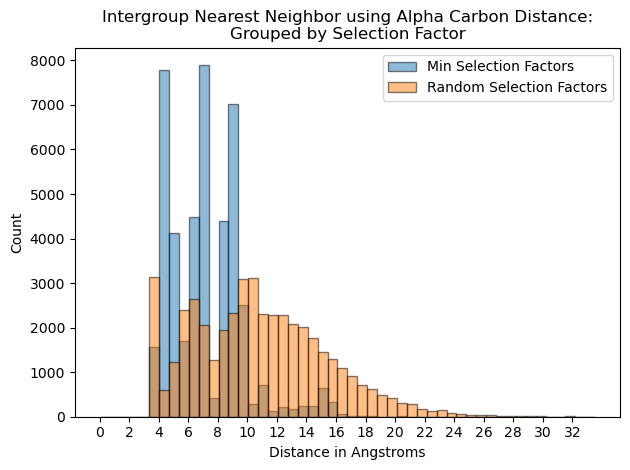

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-max.ca_dist.png


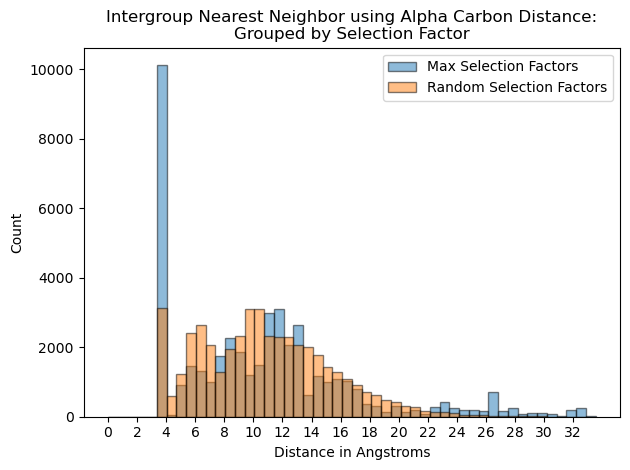

In [30]:
for dist_type in dist_types:
    print(f"ca_size[{dist_type}]: {len(ca_dists[dist_type])}")

# bin data
min_val = 0
max_val = max(np.max(ca_dists['min']), np.max(ca_dists['max']), np.max(ca_dists['max']))
num_bins = 50
bins = np.linspace(min_val, max_val, num_bins+1)


for dist_type in ['min', 'max']:
    if dist_type == 'max':
        plt.hist((ca_dists['max'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Max Selection Factors', edgecolor='black')
    if dist_type == 'min':
        plt.hist((ca_dists['min'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Min Selection Factors', edgecolor='black')
    plt.hist(ca_dists['random'], bins=bins, alpha=0.5, label='Random Selection Factors', edgecolor='black')

    plt.xticks(np.arange(0, np.ceil(max_val), 2))
    plt.xlabel('Distance in Angstroms')
    plt.ylabel('Count')
    plt.title('Intergroup Nearest Neighbor using Alpha Carbon Distance:\nGrouped by Selection Factor')
    plt.legend()
    plt.tight_layout()
    output_path = f"{FIGURES_OUTPUT_DIR}/clusters-{dist_type}.ca_dist.png"
    print(f"figure saved to: {output_path}")
    plt.savefig(output_path)
    plt.show()

aa_size[min]: 4495
aa_size[max]: 4495
aa_size[random]: 44950
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-min.aa_dist.png


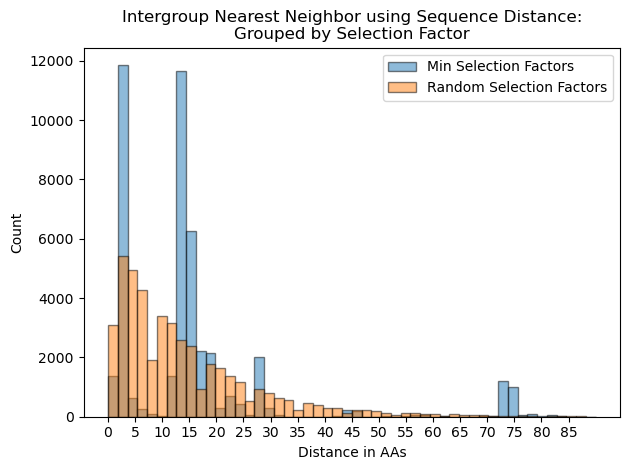

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-max.aa_dist.png


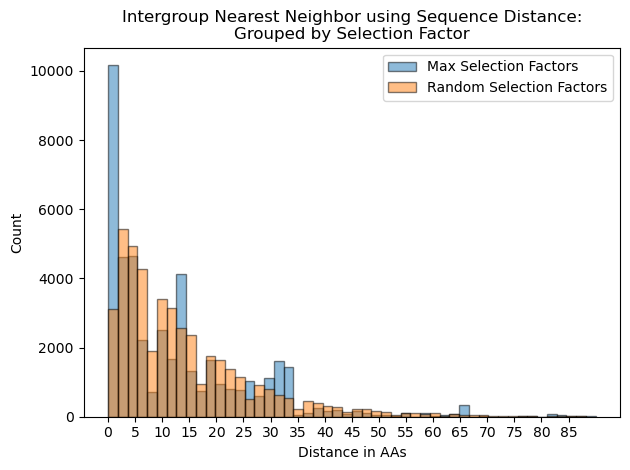

In [31]:
for dist_type in dist_types:
    print(f"aa_size[{dist_type}]: {len(aa_dists[dist_type])}")

# bin data
min_val = 0
max_val = max(np.max(aa_dists['min']), np.max(aa_dists['max']), np.max(aa_dists['max']))
num_bins = 50
bins = np.linspace(min_val, max_val, num_bins+1)

for dist_type in ['min', 'max']:
    if dist_type == 'max':
        plt.hist((aa_dists['max'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Max Selection Factors', edgecolor='black')
    if dist_type == 'min':
        plt.hist((aa_dists['min'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Min Selection Factors', edgecolor='black')
    plt.hist(aa_dists['random'], bins=bins, alpha=0.5, label='Random Selection Factors', edgecolor='black')

    plt.xticks(np.arange(0, np.ceil(max_val), 5))
    plt.xlabel('Distance in AAs')
    plt.ylabel('Count')
    plt.title('Intergroup Nearest Neighbor using Sequence Distance:\nGrouped by Selection Factor')
    plt.legend()
    plt.tight_layout()
    output_path = f"{FIGURES_OUTPUT_DIR}/clusters-{dist_type}.aa_dist.png"
    print(f"figure saved to: {output_path}")
    plt.savefig(output_path)
    plt.show()

dnsm_size[min]: 4495
dnsm_size[max]: 4495
dnsm_size[random]: 44950
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-min.dnsm.png


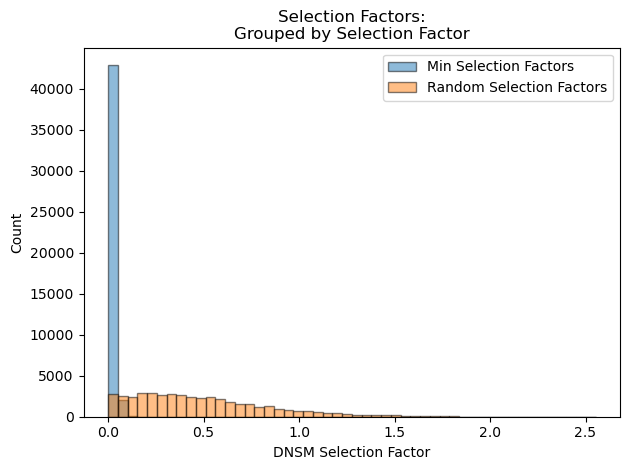

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-max.dnsm.png


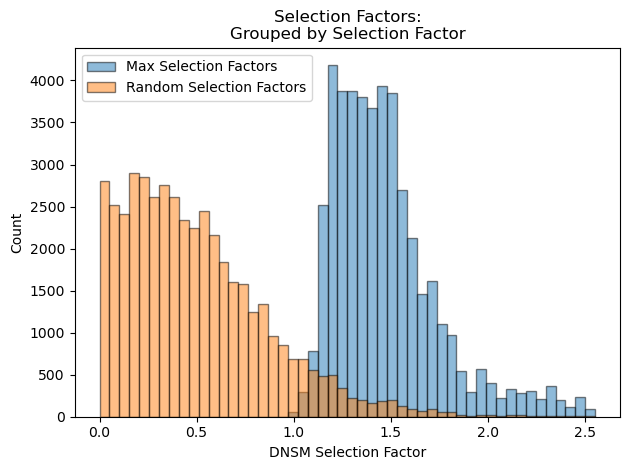

In [32]:
for dist_type in dist_types:
    print(f"dnsm_size[{dist_type}]: {len(dnsm_sfs[dist_type])}")

# bin data
min_val = 0
# min_val = min(np.min(dnsm_sfs['min']), np.min(dnsm_sfs['max']), np.min(dnsm_sfs['max']))
max_val = max(np.max(dnsm_sfs['min']), np.max(dnsm_sfs['max']), np.max(dnsm_sfs['max']))
num_bins = 50
bins = np.linspace(min_val, max_val, num_bins+1)

for dist_type in ['min', 'max']:
    if dist_type == 'max':
        plt.hist((dnsm_sfs['max'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Max Selection Factors', edgecolor='black')
    if dist_type == 'min':
        plt.hist((dnsm_sfs['min'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Min Selection Factors', edgecolor='black')
    plt.hist(dnsm_sfs['random'], bins=bins, alpha=0.5, label='Random Selection Factors', edgecolor='black')

    plt.xticks()
    plt.xlabel('DNSM Selection Factor')
    plt.ylabel('Count')
    plt.title('Selection Factors:\nGrouped by Selection Factor')
    plt.legend()
    plt.tight_layout()
    output_path = f"{FIGURES_OUTPUT_DIR}/clusters-{dist_type}.dnsm.png"
    print(f"figure saved to: {output_path}")
    plt.savefig(output_path)
    plt.show()

asa_size[min]: 4495
asa_size[max]: 4495
asa_size[random]: 44950
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-min.asa.png


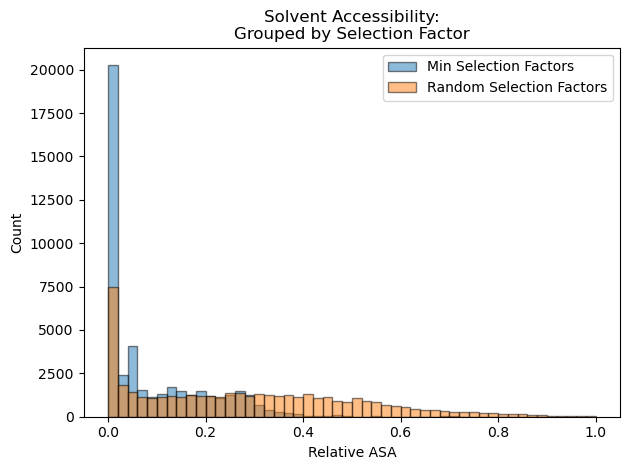

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-max.asa.png


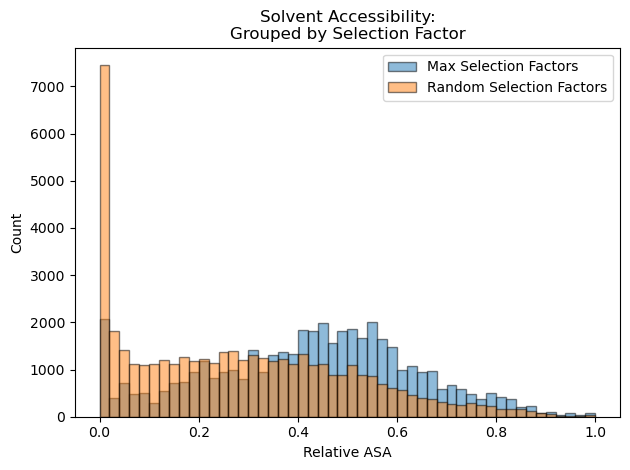

In [33]:
for dist_type in dist_types:
    print(f"asa_size[{dist_type}]: {len(rel_asas[dist_type])}")

# Bin data
min_val = 0
# min_val = min(np.min(rel_asas['min']), np.min(rel_asas['max']), np.min(rel_asas['max']))
max_val = max(np.max(rel_asas['min']), np.max(rel_asas['max']), np.max(rel_asas['max']))
num_bins = 50
bins = np.linspace(min_val, max_val, num_bins+1)

for dist_type in ['min', 'max']:
    if dist_type == 'max':
        plt.hist((rel_asas['max'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Max Selection Factors', edgecolor='black')
    if dist_type == 'min':
        plt.hist((rel_asas['min'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Min Selection Factors', edgecolor='black')
    plt.hist(rel_asas['random'], bins=bins, alpha=0.5, label='Random Selection Factors', edgecolor='black')

    plt.xticks()
    plt.xlabel('Relative ASA')
    plt.ylabel('Count')
    plt.title('Solvent Accessibility:\nGrouped by Selection Factor')
    plt.legend()
    plt.tight_layout()
    output_path = f"{FIGURES_OUTPUT_DIR}/clusters-{dist_type}.asa.png"
    print(f"figure saved to: {output_path}")
    plt.savefig(output_path)
    plt.show()

imgt_size[min]: 4495
imgt_size[max]: 4495
imgt_size[random]: 44950
['23', '121', '9', '43', '98']
['77', '72', '59', '84', '24']
['103', '102', '77', '86', '4']
figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-min.imgt-site.png


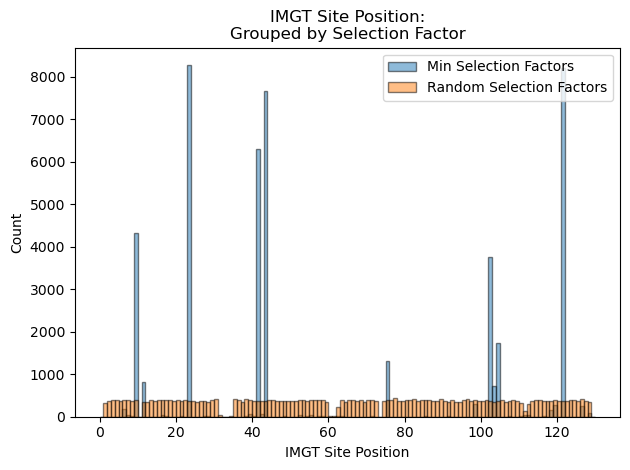

figure saved to: /home/drich/shared-data/bcr-mut-sel/output/dnsm_clustered_selection_factors/clusters-max.imgt-site.png


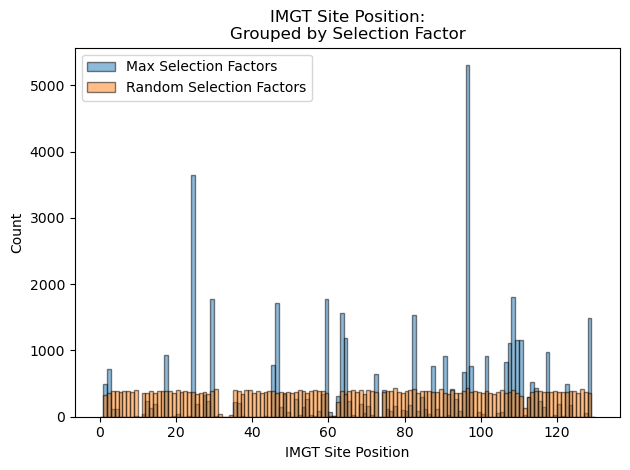

In [34]:
for dist_type in dist_types:
    print(f"imgt_size[{dist_type}]: {len(imgt_dists[dist_type])}")

imgt_dists_ = imgt_dists.copy()
for key in imgt_dists_.keys():
    print(imgt_dists_[key][0:5])
    imgt_dists_[key] = [int(x.rstrip("ABCDEFGHIJKLMNOPQRSTUVWXYZ")) for x in imgt_dists_[key]]

# Bin data
min_val = 0
max_val = 130
# min_val = min(np.min(imgt_dists['min']), np.min(imgt_dists['max']), np.min(imgt_dists['max']))
# max_val = max(np.max(imgt_dists_['min']), np.max(imgt_dists_['max']), np.max(imgt_dists_['max']))
num_bins = 130
bins = np.linspace(min_val, max_val, num_bins+1)

for dist_type in ['min', 'max']:
    if dist_type == 'max':
        plt.hist((imgt_dists_['max'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Max Selection Factors', edgecolor='black')
    if dist_type == 'min':
        plt.hist((imgt_dists_['min'] * null_samples_per_abid), bins=bins, alpha=0.5, label='Min Selection Factors', edgecolor='black')
    plt.hist(imgt_dists_['random'], bins=bins, alpha=0.5, label='Random Selection Factors', edgecolor='black')

    plt.xticks()
    plt.xlabel('IMGT Site Position')
    plt.ylabel('Count')
    plt.title('IMGT Site Position:\nGrouped by Selection Factor')
    plt.legend()
    plt.tight_layout()
    output_path = f"{FIGURES_OUTPUT_DIR}/clusters-{dist_type}.imgt-site.png"
    print(f"figure saved to: {output_path}")
    plt.savefig(output_path)
    plt.show()